In [1]:
import os
import shutil
import subprocess
from PIL import Image
import cv2
from Real_ESRGAN.inference_realesrgan import main
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

C:\Users\Mark\anaconda3\envs\py39\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Mark\anaconda3\envs\py39\lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


## Real-ESRGAN

In [2]:
upload_folder = 'upload/'
result_folder = 'results/'

In [7]:
image = Image.open("mountains_1.jpg")

In [9]:
files = next(os.walk(upload_folder))[2] #dir is your directory path as string
files_num = len(files)

In [11]:
image.save(upload_folder + str(files_num) + ".jpg")

In [2]:
image = cv2.imread("mountains_2.jpg", cv2.IMREAD_UNCHANGED)

In [3]:
image.shape

(552, 736, 3)

In [23]:
result = main(model_name="RealESRGAN_x4plus", input_obj=image, output_obj=None, outscale=3.5, half=True, face_enhance=True, ext="jpg")

Error CUDA out of memory. Tried to allocate 676.00 MiB (GPU 0; 2.00 GiB total capacity; 714.95 MiB already allocated; 93.30 MiB free; 1.03 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
If you encounter CUDA out of memory, try to set --tile with a smaller number.


In [ ]:
result.shape

In [ ]:
image.shape

In [5]:
def display(img1, img2):
    fig = plt.figure(figsize=(25, 10))
    ax1 = fig.add_subplot(1, 2, 1) 
    plt.title('Input image', fontsize=16)
    ax1.axis('off')
    ax2 = fig.add_subplot(1, 2, 2)
    plt.title('Real-ESRGAN output', fontsize=16)
    ax2.axis('off')
    ax1.imshow(img1)
    ax2.imshow(img2)

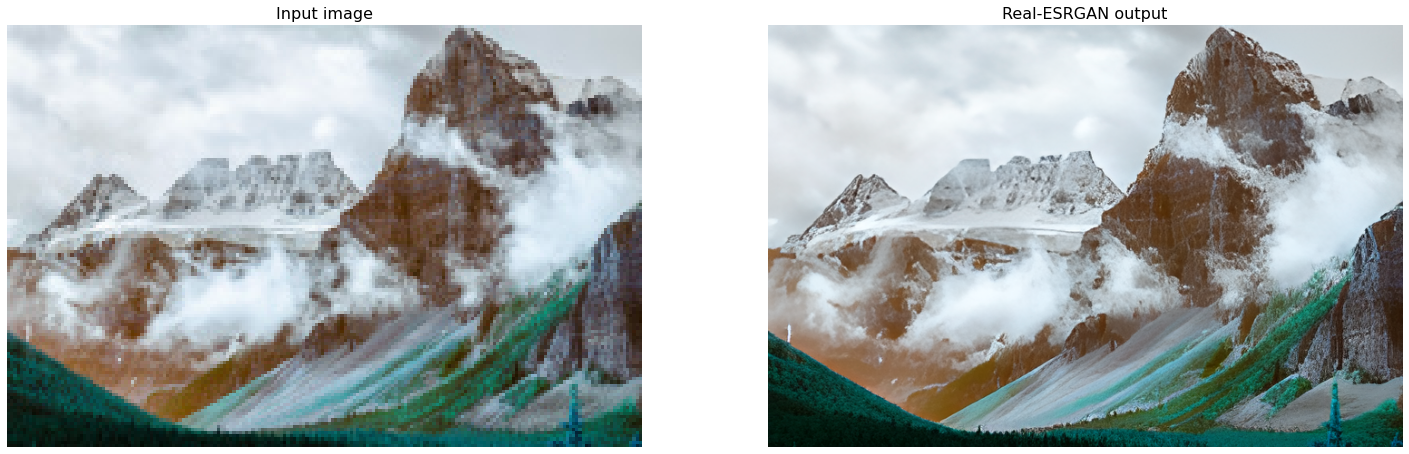

In [6]:
display(image, result)

In [24]:
cv2.imread('Style_GAN/images/candy.jpg', cv2.IMREAD_UNCHANGED)

array([[[ 97,  96, 128],
        [155, 155, 185],
        [201, 201, 231],
        ...,
        [ 75, 201, 235],
        [ 76, 208, 238],
        [ 79, 214, 242]],

       [[ 16,  18,  49],
        [ 21,  23,  53],
        [ 50,  52,  82],
        ...,
        [ 78, 205, 236],
        [ 70, 203, 231],
        [ 89, 224, 252]],

       [[ 26,  28,  59],
        [  8,  10,  40],
        [ 21,  23,  53],
        ...,
        [ 77, 205, 234],
        [ 54, 187, 214],
        [ 84, 220, 246]],

       ...,

       [[ 25,  17,  88],
        [ 24,  16,  87],
        [ 23,  15,  86],
        ...,
        [  6,   3,  25],
        [  7,   4,  26],
        [  7,   4,  26]],

       [[ 22,  14,  84],
        [ 22,  14,  84],
        [ 21,  14,  81],
        ...,
        [  6,   4,  24],
        [  7,   5,  25],
        [  7,   4,  26]],

       [[ 17,  10,  77],
        [ 16,   9,  76],
        [ 16,   9,  76],
        ...,
        [  6,   4,  24],
        [  7,   5,  25],
        [  7,   5,  25]]

In [2]:
from Style_GAN.inference_stylegan import run

In [3]:
image = cv2.imread("orig_picture.jpg", cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [12]:
image.shape

(817, 1280, 3)

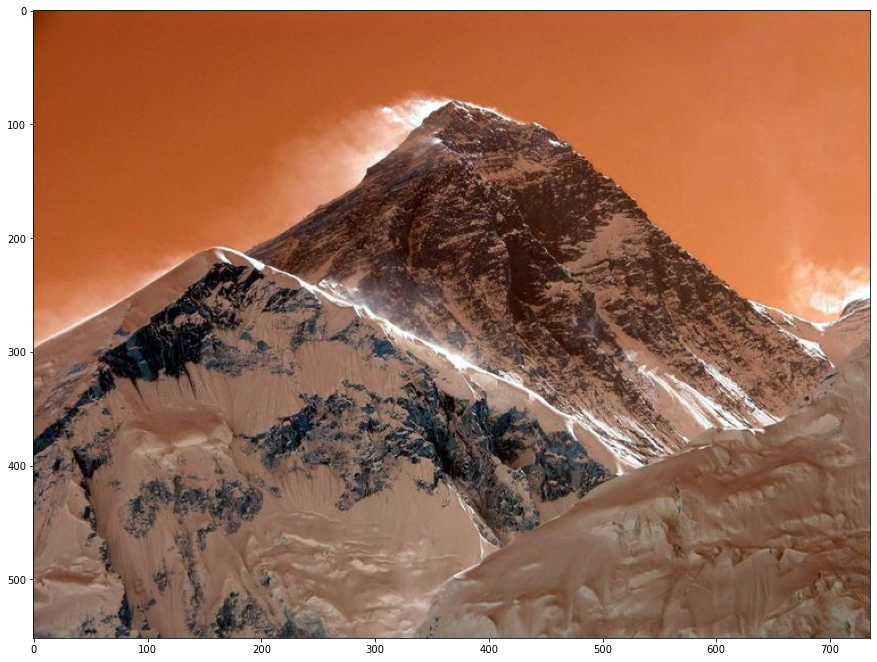

In [5]:
plt.figure(figsize=(15, 15))
plt.imshow(image)

In [6]:
res = run(image, input_size=552, style="feathers")

In [4]:
for filter_name in tqdm(["candy", "feathers", "mosaic", "rain_princess", "starry_night", "udnie", "wave"]):
    res = run(image, input_size=817, style=filter_name)
    cv2.imwrite(f"results/{filter_name}.jpg", res)

100%|██████████| 7/7 [01:51<00:00, 15.89s/it]


In [7]:
res.shape

(736, 552, 3)

In [8]:
res.squeeze(0).shape

torch.Size([3, 480, 360])

In [12]:
img = res.squeeze(0).detach().numpy().transpose(2, 1, 0)

In [16]:
np.max(img)

363.1315

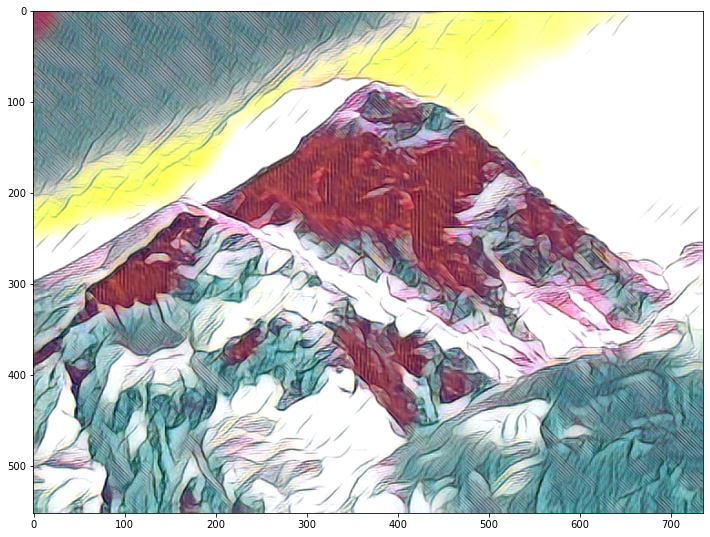

In [8]:
plt.figure(figsize=(12, 12))
plt.imshow(res)